# Hospital Treatment Package Pricing

In [1]:
import pandas as pd
data = pd.read_excel('Dataset_Project.xlsx')
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,ELECTIVE,1,295155.0,12.595256,10,3,7,Y,1,35000
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,200321.0,12.207676,11,2,9,Y,1,26000
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,191188.0,12.161013,13,5,8,N,0,0
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,202807.0,12.220010,9,6,3,N,0,0


## Data Preprocessing

In [2]:
duplicates = data[data.duplicated()]
duplicates

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT


In [3]:
data.loc[(data["AGE"] < 20) & (data["BP-LOW"].isnull()), "BP-LOW"] = 80
data.loc[(data["AGE"] < 20) & (data["BP -HIGH"].isnull()), "BP -HIGH"] = 120

In [4]:
data.isnull().sum()

SL.                               0
AGE                               0
GENDER                            0
MALE                              0
MARITAL STATUS                    0
UNMARRIED                         0
KEY COMPLAINTS -CODE             36
ACHD                              0
CAD-DVD                           0
CAD-SVD                           0
CAD-TVD                           0
CAD-VSD                           0
OS-ASD                            0
other- heart                      0
other- respiratory                0
other-general                     0
other-nervous                     0
other-tertalogy                   0
PM-VSD                            0
RHD                               0
BODY WEIGHT                       0
BODY HEIGHT                       0
HR PULSE                          0
BP -HIGH                          0
BP-LOW                            0
RR                                0
PAST MEDICAL HISTORY CODE       173
Diabetes1                   

In [5]:
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)
    
replacement_value_keyComplaint = "no complaint"
replacement_value_PastHistory = "no history"

data['KEY COMPLAINTS -CODE'].fillna(replacement_value_keyComplaint, inplace=True)
data['PAST MEDICAL HISTORY CODE'].fillna(replacement_value_keyComplaint, inplace=True)
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,ELECTIVE,1,295155.0,12.595256,10,3,7,Y,1,35000
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,200321.0,12.207676,11,2,9,Y,1,26000
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,191188.0,12.161013,13,5,8,N,0,0
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,202807.0,12.220010,9,6,3,N,0,0


In [6]:
data.isnull().sum()

SL.                             0
AGE                             0
GENDER                          0
MALE                            0
MARITAL STATUS                  0
UNMARRIED                       0
KEY COMPLAINTS -CODE            0
ACHD                            0
CAD-DVD                         0
CAD-SVD                         0
CAD-TVD                         0
CAD-VSD                         0
OS-ASD                          0
other- heart                    0
other- respiratory              0
other-general                   0
other-nervous                   0
other-tertalogy                 0
PM-VSD                          0
RHD                             0
BODY WEIGHT                     0
BODY HEIGHT                     0
HR PULSE                        0
BP -HIGH                        0
BP-LOW                          0
RR                              0
PAST MEDICAL HISTORY CODE       0
Diabetes1                       0
Diabetes2                       0
hypertension1 

In [7]:

def categorize_blood_pressure(row):
    high_bp = row["BP -HIGH"]
    low_bp = row["BP-LOW"]
    
    if high_bp < 120 and low_bp < 80:
        return "Normal"
    elif 120 <= high_bp <= 129 and low_bp < 80:
        return "Elevated"
    elif 130 <= high_bp <= 139 or 80 <= low_bp <= 89:
        return "High Blood Pressure (Hypertension) Stage 1"
    elif 140 <= high_bp or 90 <= low_bp:
        return "High Blood Pressure (Hypertension) Stage 2"
    elif high_bp > 180 or low_bp > 120:
        return "Hypertensive Crisis (Seek Emergency Care)"
    
    else:
        return "Uncategorized"

data['BP_CAT'] = data.apply(categorize_blood_pressure, axis=1)

data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,0,660293.0,13.400439,25,12,13,Y,1,38000,High Blood Pressure (Hypertension) Stage 1
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,0,809130.0,13.603715,41,20,21,Y,1,39690,Normal
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,362231.0,12.800037,18,9,9,N,0,0,High Blood Pressure (Hypertension) Stage 1
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,0,629990.0,13.353459,14,13,1,Y,1,89450,High Blood Pressure (Hypertension) Stage 1
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,0,444876.0,13.005551,24,12,12,N,0,0,High Blood Pressure (Hypertension) Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,1,295155.0,12.595256,10,3,7,Y,1,35000,High Blood Pressure (Hypertension) Stage 1
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,200321.0,12.207676,11,2,9,Y,1,26000,Normal
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,1,191188.0,12.161013,13,5,8,N,0,0,High Blood Pressure (Hypertension) Stage 2
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,0,202807.0,12.220010,9,6,3,N,0,0,Normal


In [8]:

data['BMI']=data['BODY WEIGHT']/((data['BODY HEIGHT']/100)**2)
def categorize_bmi(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif BMI < 25:
        return 'Normal'
    elif BMI < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_CATEGORY'] = data['BMI'].apply(categorize_bmi)



# data
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT,BMI,BMI_CATEGORY
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,13.400439,25,12,13,Y,1,38000,High Blood Pressure (Hypertension) Stage 1,19.218750,Normal
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.603715,41,20,21,Y,1,39690,Normal,17.065557,Underweight
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,12.800037,18,9,9,N,0,0,High Blood Pressure (Hypertension) Stage 1,17.325996,Underweight
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.353459,14,13,1,Y,1,89450,High Blood Pressure (Hypertension) Stage 1,26.729927,Overweight
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,13.005551,24,12,12,N,0,0,High Blood Pressure (Hypertension) Stage 2,18.938776,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,12.595256,10,3,7,Y,1,35000,High Blood Pressure (Hypertension) Stage 1,22.275310,Normal
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,12.207676,11,2,9,Y,1,26000,Normal,22.546576,Normal
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,12.161013,13,5,8,N,0,0,High Blood Pressure (Hypertension) Stage 2,22.942130,Normal
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,12.220010,9,6,3,N,0,0,Normal,23.875115,Normal


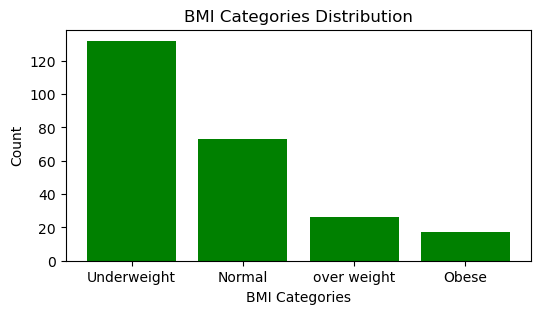

In [9]:
import matplotlib.pyplot as plt

age_categories = ['Underweight', 'Normal', 'over weight','Obese']

count_series = data['BMI_CATEGORY'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(age_categories, count_series, color='green')


plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.title('BMI Categories Distribution')


plt.show()


In [10]:


age_categories = [(0, 10), (11, 25), (26, 50), (51, float('inf'))]
age_labels = ['Child', 'Young Adult', 'Adult', 'Old']

data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[min for min, max in age_categories] + [float('inf')], labels=age_labels, right=False)
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT,BMI,BMI_CATEGORY,AGE_GROUP
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,25,12,13,Y,1,38000,High Blood Pressure (Hypertension) Stage 1,19.218750,Normal,Old
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,41,20,21,Y,1,39690,Normal,17.065557,Underweight,Old
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,18,9,9,N,0,0,High Blood Pressure (Hypertension) Stage 1,17.325996,Underweight,Old
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,14,13,1,Y,1,89450,High Blood Pressure (Hypertension) Stage 1,26.729927,Overweight,Adult
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,24,12,12,N,0,0,High Blood Pressure (Hypertension) Stage 2,18.938776,Normal,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,10,3,7,Y,1,35000,High Blood Pressure (Hypertension) Stage 1,22.275310,Normal,Old
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,11,2,9,Y,1,26000,Normal,22.546576,Normal,Old
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,13,5,8,N,0,0,High Blood Pressure (Hypertension) Stage 2,22.942130,Normal,Adult
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,9,6,3,N,0,0,Normal,23.875115,Normal,Old


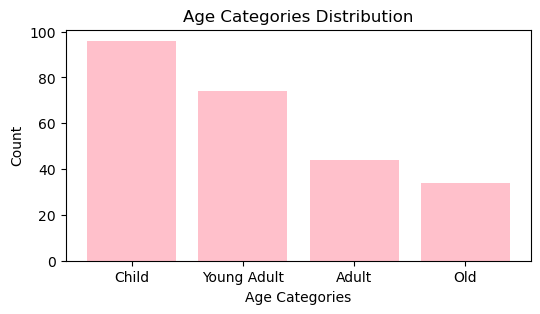

In [11]:
import matplotlib.pyplot as plt


age_categories = ['Child', 'Young Adult', 'Adult', 'Old']


count_series = data['AGE_GROUP'].value_counts()


plt.figure(figsize=(6, 3))
plt.bar(age_categories, count_series, color='pink')


plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.title('Age Categories Distribution')

plt.show()


### Final Dataset

In [12]:
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT,BMI,BMI_CATEGORY,AGE_GROUP
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,25,12,13,Y,1,38000,High Blood Pressure (Hypertension) Stage 1,19.218750,Normal,Old
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,41,20,21,Y,1,39690,Normal,17.065557,Underweight,Old
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,18,9,9,N,0,0,High Blood Pressure (Hypertension) Stage 1,17.325996,Underweight,Old
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,14,13,1,Y,1,89450,High Blood Pressure (Hypertension) Stage 1,26.729927,Overweight,Adult
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,24,12,12,N,0,0,High Blood Pressure (Hypertension) Stage 2,18.938776,Normal,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,10,3,7,Y,1,35000,High Blood Pressure (Hypertension) Stage 1,22.275310,Normal,Old
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,11,2,9,Y,1,26000,Normal,22.546576,Normal,Old
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,13,5,8,N,0,0,High Blood Pressure (Hypertension) Stage 2,22.942130,Normal,Adult
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,9,6,3,N,0,0,Normal,23.875115,Normal,Old


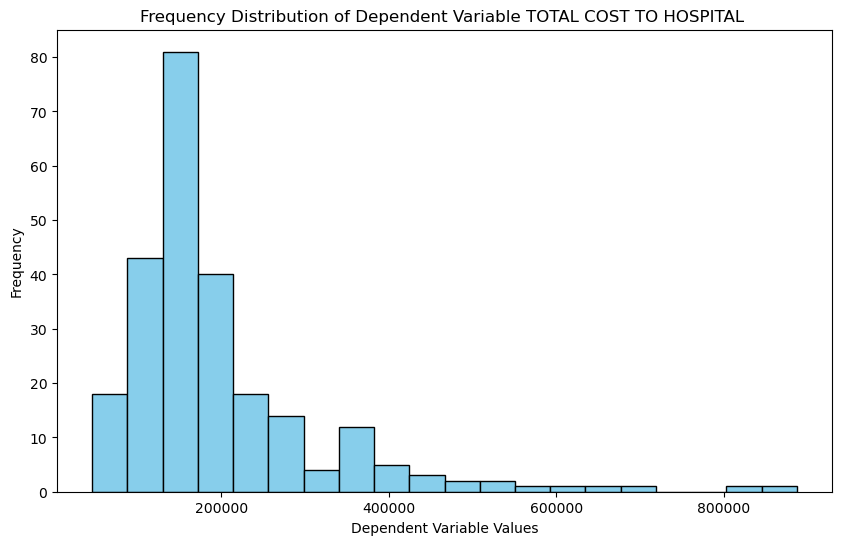

In [13]:
import matplotlib.pyplot as plt


dependent_variable = 'TOTAL COST TO HOSPITAL '


plt.figure(figsize=(10, 6))
plt.hist(data[dependent_variable], bins=20, color='skyblue', edgecolor='black')


plt.xlabel('Dependent Variable Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dependent Variable TOTAL COST TO HOSPITAL ')


plt.show()

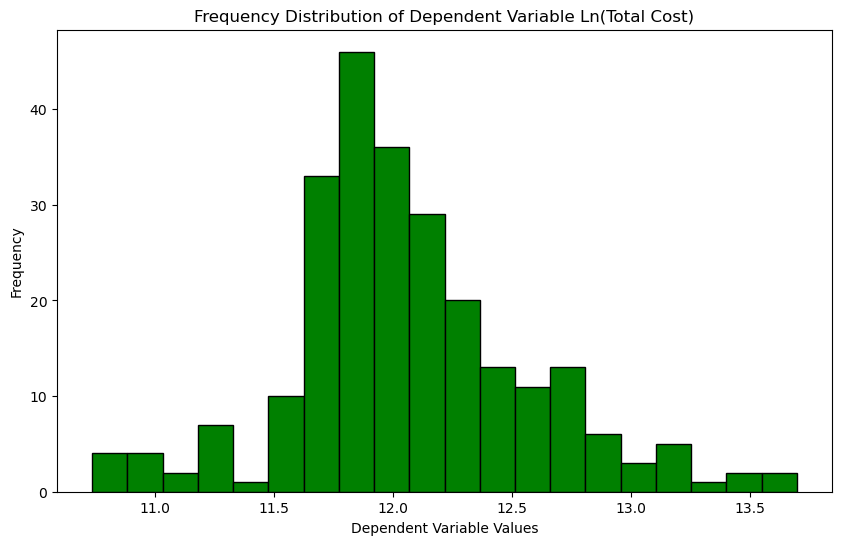

In [14]:
import matplotlib.pyplot as plt


dependent_variable = 'Ln(Total Cost)'


plt.figure(figsize=(10, 6))
plt.hist(data[dependent_variable], bins=20, color='green', edgecolor='black')


plt.xlabel('Dependent Variable Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dependent Variable Ln(Total Cost)')


plt.show()

## Box plot to represent outliers

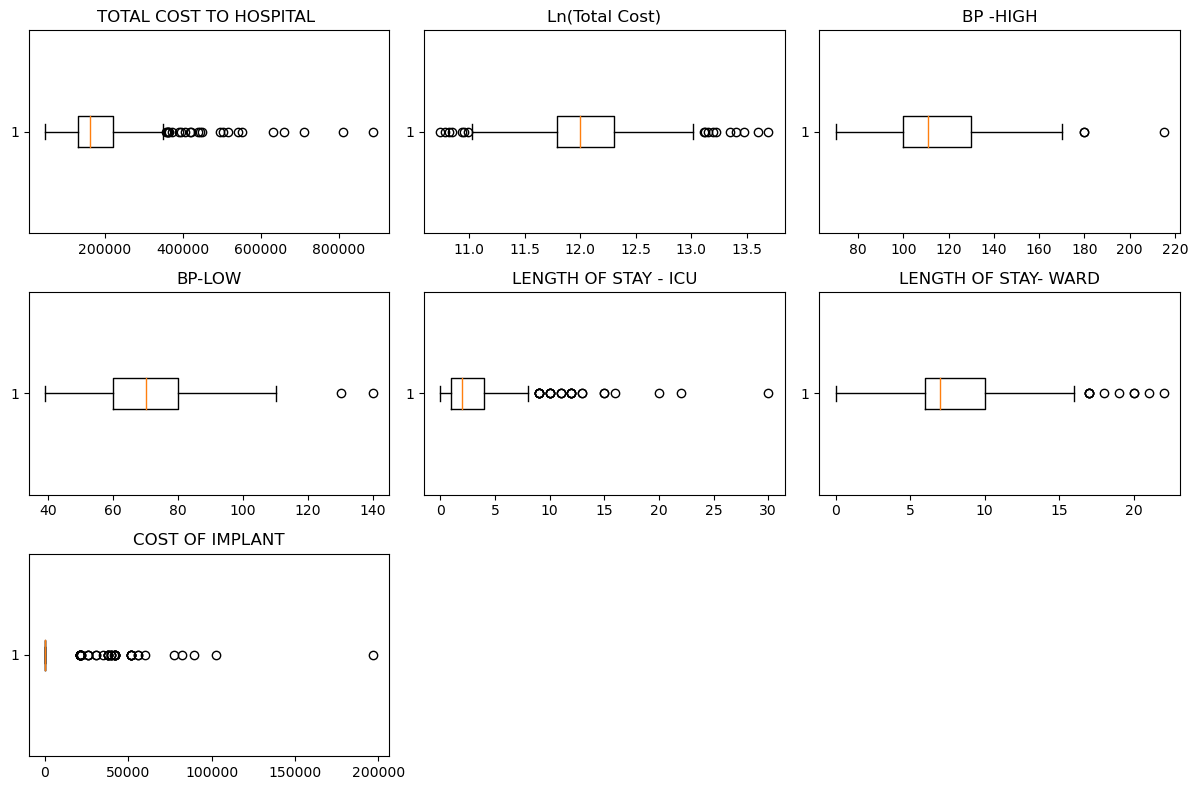

In [15]:
import matplotlib.pyplot as plt
import pandas as pd



attributes = ['TOTAL COST TO HOSPITAL ', "Ln(Total Cost)", 'BP -HIGH', 'BP-LOW',"LENGTH OF STAY - ICU", "LENGTH OF STAY- WARD", "COST OF IMPLANT"]

# Create subplots for each attribute
plt.figure(figsize=(12, 8))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(data[attribute], vert=False)
    plt.title(attribute)


plt.tight_layout()


plt.show()


In [16]:

data1 = data.copy()
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE', 'PAST MEDICAL HISTORY CODE', 'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN', 'IMPLANT USED (Y/N)',"BP_CAT","BMI_CATEGORY","AGE_GROUP"]


label_encoder = LabelEncoder()


for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT,BMI,BMI_CATEGORY,AGE_GROUP
0,1,58.0,1,0,0,0,9,0,0,0,...,25,12,13,1,1,38000,1,19.218750,0,2
1,2,59.0,1,0,0,0,1,0,1,0,...,41,20,21,1,1,39690,3,17.065557,3,2
2,3,82.0,1,0,0,0,3,0,0,0,...,18,9,9,0,0,0,1,17.325996,3,2
3,4,46.0,1,0,0,0,1,0,1,0,...,14,13,1,1,1,89450,1,26.729927,2,0
4,5,60.0,1,0,0,0,1,0,1,0,...,24,12,12,0,0,0,2,18.938776,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,1,0,0,0,9,0,0,0,...,10,3,7,1,1,35000,1,22.275310,0,2
244,245,58.0,1,0,0,0,3,0,0,0,...,11,2,9,1,1,26000,3,22.546576,0,2
245,246,44.0,1,0,0,0,3,0,0,0,...,13,5,8,0,0,0,2,22.942130,0,0
246,247,60.0,1,0,0,0,9,0,0,0,...,9,6,3,0,0,0,3,23.875115,0,2


## FEATURE SELECTION

### model for treatment related Health issues

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns1 = ["GENDER", "MARITAL STATUS", "BP_CAT", "Diabetes1", "Diabetes2", "hypertension1", "hypertension2", "hypertension3", "other", "ACHD", "CAD-DVD", "CAD-SVD", "CAD-TVD", "OS-ASD", "CAD-VSD", "PM-VSD", "RHD", "other- respiratory", "other-general", "ACHD", "CAD-DVD" , "CAD-SVD","BP_CAT",]
newdata= scaler.fit_transform(data[columns1])
newdata = pd.DataFrame(newdata, columns=columns1)
newdata


,GENDER,MARITAL STATUS,BP_CAT,Diabetes1,Diabetes2,hypertension1,hypertension2,hypertension3,other,ACHD,...,OS-ASD,CAD-VSD,PM-VSD,RHD,other- respiratory,other-general,ACHD,CAD-DVD,CAD-SVD,BP_CAT
0,0.702834,-1.13855,-1.016876,-0.20498,-0.194054,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,-1.016876
1,0.702834,-1.13855,1.033411,-0.20498,-0.194054,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,2.860976,-0.090167,1.033411
2,0.702834,-1.13855,-1.016876,-0.20498,5.153208,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,-1.016876
3,0.702834,-1.13855,-1.016876,-0.20498,-0.194054,3.127716,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,2.860976,-0.090167,-1.016876
4,0.702834,-1.13855,0.008267,-0.20498,5.153208,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,2.860976,-0.090167,0.008267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.702834,-1.13855,-1.016876,-0.20498,-0.194054,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,-1.016876
244,0.702834,-1.13855,1.033411,-0.20498,-0.194054,-0.319722,-0.2352,-0.143444,3.941235,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,1.033411
245,0.702834,-1.13855,0.008267,-0.20498,-0.194054,3.127716,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,0.008267
246,0.702834,-1.13855,1.033411,-0.20498,-0.194054,-0.319722,-0.2352,-0.143444,-0.253728,-0.288044,...,-0.253728,-0.063628,-0.157459,-0.342224,-0.253728,-0.063628,-0.288044,-0.349531,-0.090167,1.033411


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X =newdata[["GENDER", "MARITAL STATUS", "BP_CAT", "Diabetes1", "Diabetes2", "hypertension1", "hypertension2", "hypertension3", "other", "ACHD", "CAD-DVD", "CAD-SVD", "CAD-TVD", "OS-ASD", "CAD-VSD", "PM-VSD", "RHD", "other- respiratory", "other-general", "ACHD", "CAD-DVD" , "CAD-SVD"]]
y = data["Ln(Total Cost)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_linear_regression = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


mse = mean_squared_error(y_test, y_pred_linear_regression)


r2 = r2_score(y_test, y_pred_linear_regression)

print(f"R-squared for category-1: {r2}")

R-squared for category-1: 0.2668218154264945


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


implant_used_data = data[data['IMPLANT USED (Y/N)'] == 1]

scaler.fit(implant_used_data[['COST OF IMPLANT']])


implant_used_data['COST OF IMPLANT'] = scaler.transform(implant_used_data[['COST OF IMPLANT']])


data.loc[data['IMPLANT USED (Y/N)'] == 1] = implant_used_data


data

C:\Users\abhir\AppData\Local\Temp\ipykernel_4548\2191853303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  implant_used_data['COST OF IMPLANT'] = scaler.transform(implant_used_data[['COST OF IMPLANT']])


,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,BP_CAT,BMI,BMI_CATEGORY,AGE_GROUP
0,1,58.0,1,0,0,0,9,0,0,0,...,25,12,13,1,1,0.097701,1,19.218750,0,2
1,2,59.0,1,0,0,0,1,0,1,0,...,41,20,21,1,1,0.107300,3,17.065557,3,2
2,3,82.0,1,0,0,0,3,0,0,0,...,18,9,9,0,0,0.000000,1,17.325996,3,2
3,4,46.0,1,0,0,0,1,0,1,0,...,14,13,1,1,1,0.389950,1,26.729927,2,0
4,5,60.0,1,0,0,0,1,0,1,0,...,24,12,12,0,0,0.000000,2,18.938776,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,1,0,0,0,9,0,0,0,...,10,3,7,1,1,0.080660,1,22.275310,0,2
244,245,58.0,1,0,0,0,3,0,0,0,...,11,2,9,1,1,0.029537,3,22.546576,0,2
245,246,44.0,1,0,0,0,3,0,0,0,...,13,5,8,0,0,0.000000,2,22.942130,0,0
246,247,60.0,1,0,0,0,9,0,0,0,...,9,6,3,0,0,0.000000,3,23.875115,0,2


In [20]:
columns2 = ["LENGTH OF STAY - ICU", "LENGTH OF STAY- WARD","BMI","MODE OF ARRIVAL","STATE AT THE TIME OF ARRIVAL","IMPLANT USED (Y/N)","AMBULANCE","AGE_GROUP","TOTAL LENGTH OF STAY"]
newdata2= scaler.fit_transform(data[columns2])
newdata2 = pd.DataFrame(newdata2, columns=columns2)
newdata2["COST OF IMPLANT"] =data["COST OF IMPLANT"]
newdata2

,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,BMI,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,IMPLANT USED (Y/N),AMBULANCE,AGE_GROUP,TOTAL LENGTH OF STAY,COST OF IMPLANT
0,0.400000,0.590909,0.024064,0.0,0.0,1.0,1.0,0.666667,0.578947,0.097701
1,0.666667,0.954545,0.018609,0.0,0.0,1.0,1.0,0.666667,1.000000,0.107300
2,0.300000,0.409091,0.019269,1.0,0.0,0.0,0.0,0.666667,0.394737,0.000000
3,0.433333,0.045455,0.043094,0.0,0.0,1.0,1.0,0.000000,0.289474,0.389950
4,0.400000,0.545455,0.023355,0.0,0.0,0.0,1.0,0.666667,0.552632,0.000000
...,...,...,...,...,...,...,...,...,...,...
243,0.100000,0.318182,0.031808,1.0,0.0,1.0,0.0,0.666667,0.184211,0.080660
244,0.066667,0.409091,0.032495,1.0,0.0,1.0,0.0,0.666667,0.210526,0.029537
245,0.166667,0.363636,0.033497,1.0,0.0,0.0,0.0,0.000000,0.263158,0.000000
246,0.200000,0.136364,0.035861,0.0,0.0,0.0,1.0,0.666667,0.157895,0.000000


In [21]:

X = newdata2[["LENGTH OF STAY - ICU", "LENGTH OF STAY- WARD", "COST OF IMPLANT","BMI","MODE OF ARRIVAL","STATE AT THE TIME OF ARRIVAL","IMPLANT USED (Y/N)","AMBULANCE","AGE_GROUP"]]
newdata2= scaler.fit_transform(data[columns2])
y = data["Ln(Total Cost)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_linear_regression = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_linear_regression)


r2 = r2_score(y_test, y_pred_linear_regression)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.07636641971787399
R-squared: 0.6697796706522676


In [22]:

correlation = data['GENDER'].corr(data['Ln(Total Cost)'])
print(f'Correlation between GENDER and Ln(Total Cost): {correlation}')

correlation = data['MARITAL STATUS'].corr(data['Ln(Total Cost)'])
print(f'Correlation between MARITAL STATUS and Ln(Total Cost): {correlation}')

correlation = data['BP_CAT'].corr(data['Ln(Total Cost)'])
print(f'Correlation between BP_CAT and Ln(Total Cost): {correlation}')

correlation = data['Diabetes1'].corr(data['Ln(Total Cost)'])
print(f'Correlation between Diabetes1 and Ln(Total Cost): {correlation}')

correlation = data['Diabetes2'].corr(data['Ln(Total Cost)'])
print(f'Correlation between Diabetes2 and Ln(Total Cost): {correlation}')

correlation = data['hypertension1'].corr(data['Ln(Total Cost)'])
print(f'Correlation between hypertension1 and Ln(Total Cost): {correlation}')

correlation = data['hypertension2'].corr(data['Ln(Total Cost)'])
print(f'Correlation between hypertension2 and Ln(Total Cost): {correlation}')

correlation = data['hypertension3'].corr(data['Ln(Total Cost)'])
print(f'Correlation between hypertension3 and Ln(Total Cost): {correlation}')

correlation = data['other'].corr(data['Ln(Total Cost)'])
print(f'Correlation between other and Ln(Total Cost): {correlation}')

correlation = data['ACHD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between ACHD and Ln(Total Cost): {correlation}')

correlation = data['CAD-DVD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between CAD-DVD and Ln(Total Cost): {correlation}')

correlation = data['CAD-SVD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between CAD-SVD and Ln(Total Cost): {correlation}')

correlation = data['CAD-TVD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between CAD-TVD and Ln(Total Cost): {correlation}')

correlation = data['OS-ASD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between OS-ASD and Ln(Total Cost): {correlation}')

correlation = data['PM-VSD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between PM-VSD and Ln(Total Cost): {correlation}')

correlation = data['RHD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between RHD and Ln(Total Cost): {correlation}')

correlation = data['other- respiratory'].corr(data['Ln(Total Cost)'])
print(f'Correlation between other- respiratory and Ln(Total Cost): {correlation}')

correlation = data['other-general'].corr(data['Ln(Total Cost)'])
print(f'Correlation between other-general and Ln(Total Cost): {correlation}')

correlation = data['BMI'].corr(data['Ln(Total Cost)'])
print(f'Correlation between BMI and Ln(Total Cost): {correlation}')

correlation = data['AGE_GROUP'].corr(data['Ln(Total Cost)'])
print(f'Correlation between Age_Group and Ln(Total Cost): {correlation}')

correlation = data['BMI'].corr(data['Ln(Total Cost)'])
print(f'Correlation between BMI and Ln(Total Cost): {correlation}')

correlation = data['BP_CAT'].corr(data['Ln(Total Cost)'])
print(f'Correlation between BP_CAT and Ln(Total Cost): {correlation}')

correlation = data['AMBULANCE'].corr(data['Ln(Total Cost)'])
print(f'Correlation between AMBULANCE and Ln(Total Cost): {correlation}')

correlation = data['COST OF IMPLANT'].corr(data['Ln(Total Cost)'])
print(f'Correlation between COST OF IMPLANT and Ln(Total Cost): {correlation}')

correlation = data['LENGTH OF STAY - ICU'].corr(data['Ln(Total Cost)'])
print(f'Correlation between LENGTH OF STAY - ICU and Ln(Total Cost): {correlation}')

correlation = data['LENGTH OF STAY- WARD'].corr(data['Ln(Total Cost)'])
print(f'Correlation between LENGTH OF STAY- WARD and Ln(Total Cost): {correlation}')

correlation = data['IMPLANT USED (Y/N)'].corr(data['Ln(Total Cost)'])
print(f'Correlation between IMPLANT USED (Y/N) and Ln(Total Cost): {correlation}')

correlation = data['MODE OF ARRIVAL'].corr(data['Ln(Total Cost)'])
print(f'Correlation between MODE OF ARRIVAL and Ln(Total Cost): {correlation}')

correlation = data['STATE AT THE TIME OF ARRIVAL'].corr(data['Ln(Total Cost)'])
print(f'Correlation between STATE AT THE TIME OF ARRIVAL and Ln(Total Cost): {correlation}')


Correlation between GENDER and Ln(Total Cost): 0.1779887931426553
Correlation between MARITAL STATUS and Ln(Total Cost): -0.4000681575459043
Correlation between BP_CAT and Ln(Total Cost): -0.1166244529418425
Correlation between Diabetes1 and Ln(Total Cost): 0.09876811782450473
Correlation between Diabetes2 and Ln(Total Cost): 0.2816976454904357
Correlation between hypertension1 and Ln(Total Cost): 0.19695048952688116
Correlation between hypertension2 and Ln(Total Cost): -0.08206731257466927
Correlation between hypertension3 and Ln(Total Cost): 0.05678084846168756
Correlation between other and Ln(Total Cost): -0.1584060261760657
Correlation between ACHD and Ln(Total Cost): -0.22739967628625157
Correlation between CAD-DVD and Ln(Total Cost): 0.30752040890506516
Correlation between CAD-SVD and Ln(Total Cost): 0.05679855306034693
Correlation between CAD-TVD and Ln(Total Cost): 0.23286288771013613
Correlation between OS-ASD and Ln(Total Cost): -0.1087368130684394
Correlation between PM-VSD 

In [23]:

correlation_results = {
    'GENDER': 0.1779887931426553,
    'MARITAL STATUS': -0.4000681575459043,
    'BP_CAT': -0.1166244529418425,
    'Diabetes1': 0.09876811782450473,
    'Diabetes2': 0.2816976454904357,
    'hypertension1': 0.19695048952688116,
    'hypertension2': -0.08206731257466927,
    'hypertension3': 0.05678084846168756,
    'other': -0.1584060261760657,
    'ACHD': -0.22739967628625157,
    'CAD-DVD': 0.30752040890506516,
    'CAD-SVD': 0.05679855306034693,
    'CAD-TVD': 0.23286288771013613,
    'OS-ASD': -0.1087368130684394,
    'PM-VSD': -0.05803288321048086,
    'RHD': 0.21731436132637064,
    'other- respiratory': -0.11549166394165576,
    'other-general': -0.14268306302356917,
    'BMI': -0.07755552135606256,
    'Age_Group': 0.020054445063809125,
    'BP_CAT': -0.1166244529418425,
    'AMBULANCE': 0.31211852099220666,
    'COST OF IMPLANT': 0.15881069211767118,
    'LENGTH OF STAY - ICU': 0.7397061178036711,
    'LENGTH OF STAY- WARD': 0.23671658026329137,
    'IMPLANT USED (Y/N)': 0.4617210817815305,
    'MODE OF ARRIVAL': -0.2882350930161472,
    'STATE AT THE TIME OF ARRIVAL': 0.08851657053646421
}


sorted_correlation_results = {k: v for k, v in sorted(correlation_results.items(), key=lambda item: abs(item[1]), reverse=True)}


for column, correlation in sorted_correlation_results.items():
    print(f'Correlation between {column} and Ln(Total Cost): {correlation}')


Correlation between LENGTH OF STAY - ICU and Ln(Total Cost): 0.7397061178036711
Correlation between IMPLANT USED (Y/N) and Ln(Total Cost): 0.4617210817815305
Correlation between MARITAL STATUS and Ln(Total Cost): -0.4000681575459043
Correlation between AMBULANCE and Ln(Total Cost): 0.31211852099220666
Correlation between CAD-DVD and Ln(Total Cost): 0.30752040890506516
Correlation between MODE OF ARRIVAL and Ln(Total Cost): -0.2882350930161472
Correlation between Diabetes2 and Ln(Total Cost): 0.2816976454904357
Correlation between LENGTH OF STAY- WARD and Ln(Total Cost): 0.23671658026329137
Correlation between CAD-TVD and Ln(Total Cost): 0.23286288771013613
Correlation between ACHD and Ln(Total Cost): -0.22739967628625157
Correlation between RHD and Ln(Total Cost): 0.21731436132637064
Correlation between hypertension1 and Ln(Total Cost): 0.19695048952688116
Correlation between GENDER and Ln(Total Cost): 0.1779887931426553
Correlation between COST OF IMPLANT and Ln(Total Cost): 0.1588106

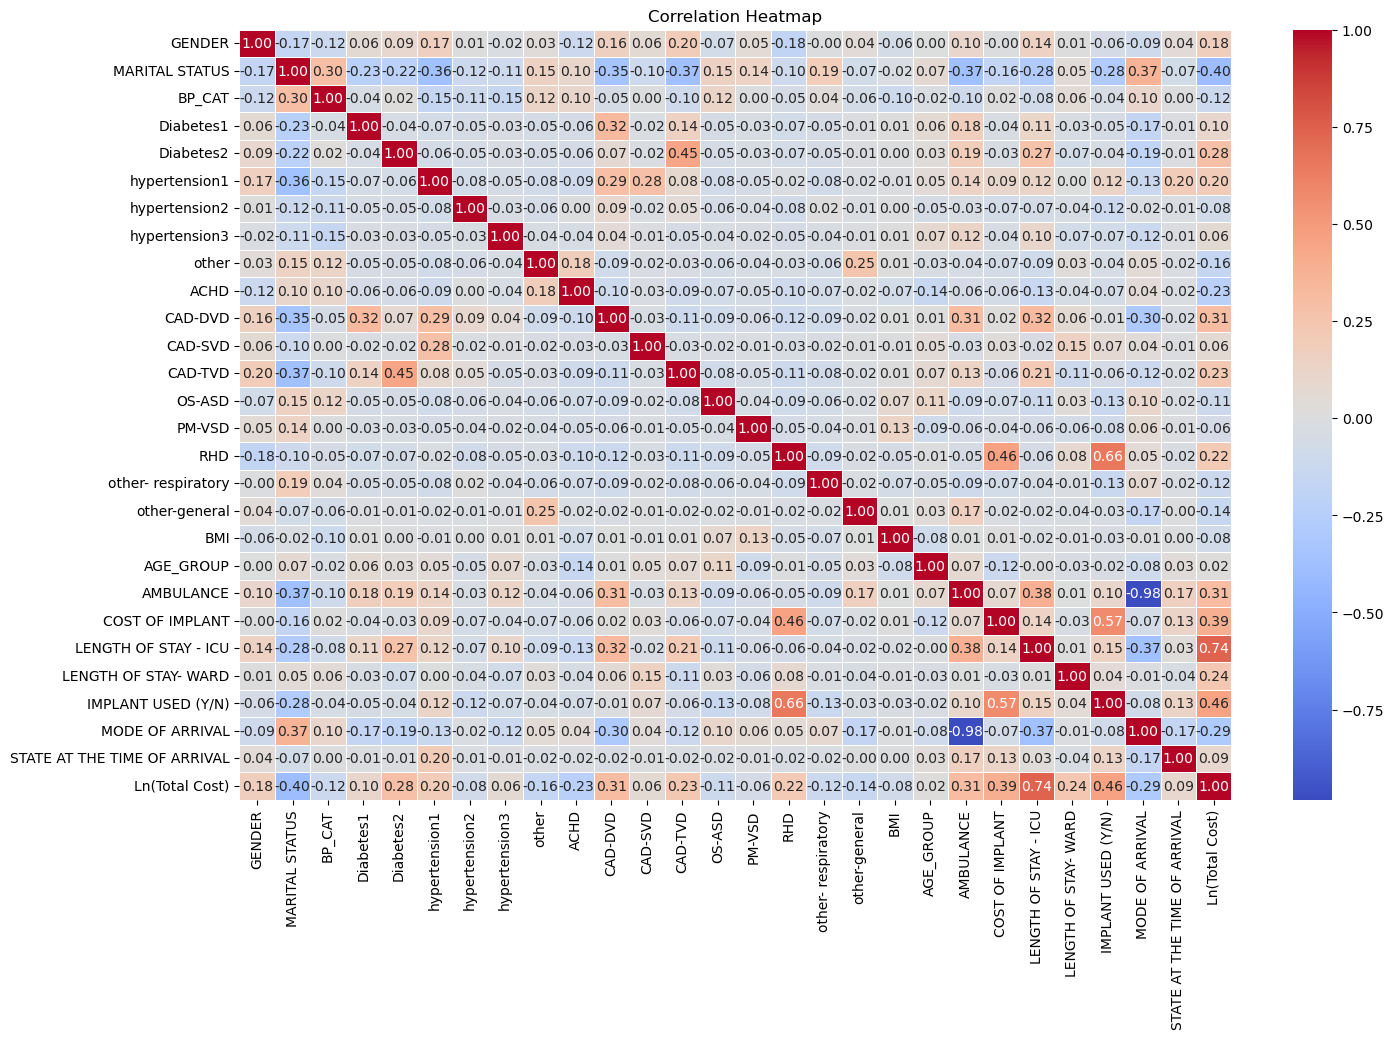

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['GENDER', 'MARITAL STATUS', 'BP_CAT', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
    'hypertension3', 'other', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'OS-ASD', 'PM-VSD', 'RHD',
    'other- respiratory', 'other-general', 'BMI', 'AGE_GROUP', 'AMBULANCE', 'COST OF IMPLANT',
    'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)', 'MODE OF ARRIVAL',
    'STATE AT THE TIME OF ARRIVAL']


correlation_matrix = data[features + ['Ln(Total Cost)']].corr()


plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()



                 Feature  Importance
22  LENGTH OF STAY - ICU    0.616817
21       COST OF IMPLANT    0.096697
23  LENGTH OF STAY- WARD    0.093394
18                   BMI    0.054326
24    IMPLANT USED (Y/N)    0.051183
9                   ACHD    0.018605
0                 GENDER    0.012906
19             AGE_GROUP    0.011746
2                 BP_CAT    0.009373
8                  other    0.008072
25       MODE OF ARRIVAL    0.004188
10               CAD-DVD    0.003320
16    other- respiratory    0.003233
4              Diabetes2    0.002982
1         MARITAL STATUS    0.002643
6          hypertension2    0.002470
13                OS-ASD    0.001495
5          hypertension1    0.001337
3              Diabetes1    0.001331
14                PM-VSD    0.000857
20             AMBULANCE    0.000814
15                   RHD    0.000767
11               CAD-SVD    0.000480
7          hypertension3    0.000468
12               CAD-TVD    0.000450


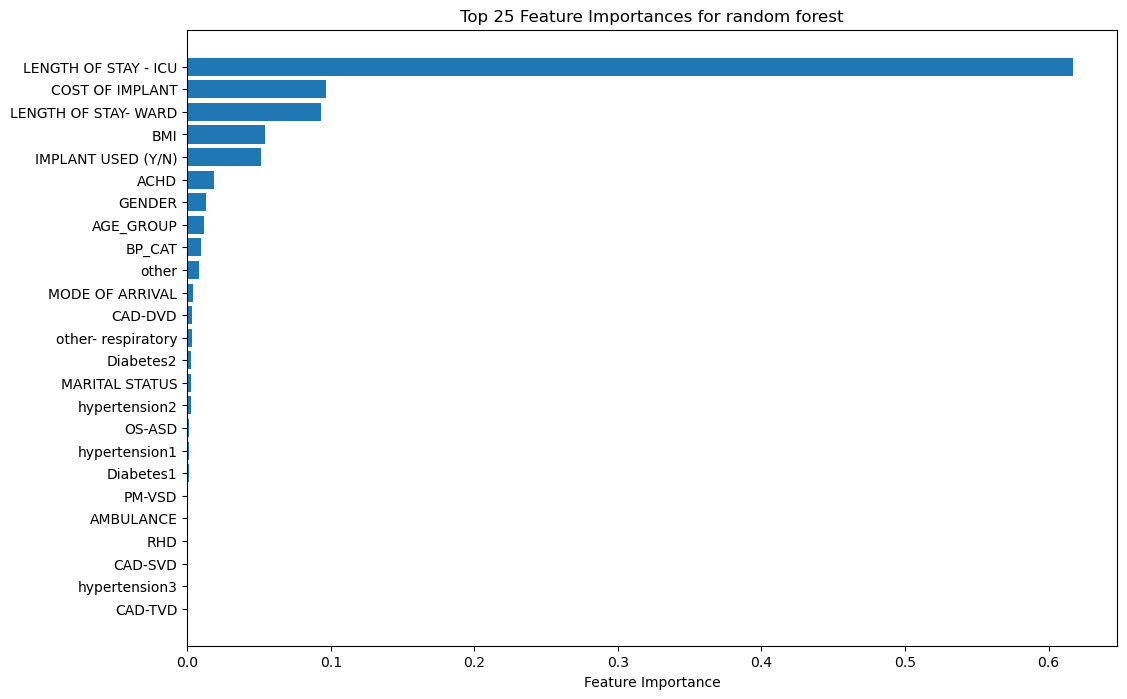

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


columns4 = ['GENDER', 'MARITAL STATUS', 'BP_CAT', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
    'hypertension3', 'other', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'OS-ASD', 'PM-VSD', 'RHD',
    'other- respiratory', 'other-general', 'BMI', 'AGE_GROUP', 'AMBULANCE', 'COST OF IMPLANT',
    'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)', 'MODE OF ARRIVAL',
    'STATE AT THE TIME OF ARRIVAL']

newdata4 = scaler.fit_transform(data[columns4])
newdata4 = pd.DataFrame(newdata4, columns=columns4)

X = newdata4[['GENDER', 'MARITAL STATUS', 'BP_CAT', 'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
    'hypertension3', 'other', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'OS-ASD', 'PM-VSD', 'RHD',
    'other- respiratory', 'other-general', 'BMI', 'AGE_GROUP', 'AMBULANCE', 'COST OF IMPLANT',
    'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)', 'MODE OF ARRIVAL',
    'STATE AT THE TIME OF ARRIVAL']]

y = data["Ln(Total Cost)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest = RandomForestRegressor(n_estimators=100, random_state=42)


random_forest.fit(X_train, y_train)


feature_importances = random_forest.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


top_n = 25 
print(importance_df.head(top_n))


plt.figure(figsize=(12, 8))
plt.barh(range(top_n), importance_df['Importance'][:top_n])
plt.yticks(range(top_n), importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances for random forest'.format(top_n))
plt.gca().invert_yaxis()
plt.show()


In [26]:
columns3 = ["LENGTH OF STAY - ICU","IMPLANT USED (Y/N)","LENGTH OF STAY- WARD","BMI", "ACHD","AGE_GROUP","GENDER","BP_CAT", "other","MODE OF ARRIVAL","Diabetes2", "CAD-DVD","other- respiratory", 
 "MARITAL STATUS"]

newdata3 = scaler.fit_transform(data[columns3])
newdata3 = pd.DataFrame(newdata3, columns=columns3)
newdata3["COST OF IMPLANT"] =data["COST OF IMPLANT"]
newdata3


,LENGTH OF STAY - ICU,IMPLANT USED (Y/N),LENGTH OF STAY- WARD,BMI,ACHD,AGE_GROUP,GENDER,BP_CAT,other,MODE OF ARRIVAL,Diabetes2,CAD-DVD,other- respiratory,MARITAL STATUS,COST OF IMPLANT
0,0.400000,1.0,0.590909,0.024064,0.0,0.666667,1.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.097701
1,0.666667,1.0,0.954545,0.018609,0.0,0.666667,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.107300
2,0.300000,0.0,0.409091,0.019269,0.0,0.666667,1.0,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.000000
3,0.433333,1.0,0.045455,0.043094,0.0,0.000000,1.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.389950
4,0.400000,0.0,0.545455,0.023355,0.0,0.666667,1.0,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.100000,1.0,0.318182,0.031808,0.0,0.666667,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.080660
244,0.066667,1.0,0.409091,0.032495,0.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.029537
245,0.166667,0.0,0.363636,0.033497,0.0,0.000000,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
246,0.200000,0.0,0.136364,0.035861,0.0,0.666667,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Training dataset

In [27]:

X = newdata3[ ["Diabetes2", "ACHD", "CAD-DVD","LENGTH OF STAY - ICU", "LENGTH OF STAY- WARD", "COST OF IMPLANT","IMPLANT USED (Y/N)", "BMI",
"AGE_GROUP","GENDER", "BP_CAT", "MARITAL STATUS"]]
y = data["Ln(Total Cost)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_test

,Diabetes2,ACHD,CAD-DVD,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,IMPLANT USED (Y/N),BMI,AGE_GROUP,GENDER,BP_CAT,MARITAL STATUS
33,0.0,0.0,0.0,0.400000,0.454545,0.000000,0.0,0.013727,0.333333,1.0,1.000000,1.0
6,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.027972,0.666667,1.0,0.666667,0.0
182,0.0,0.0,0.0,0.100000,0.636364,0.029537,1.0,0.002709,0.333333,1.0,0.333333,1.0
86,0.0,0.0,0.0,0.400000,0.681818,0.000000,0.0,0.020601,0.333333,0.0,0.333333,1.0
156,0.0,0.0,0.0,0.066667,0.363636,0.000000,0.0,0.441064,0.333333,0.0,1.000000,1.0
246,0.0,0.0,0.0,0.200000,0.136364,0.000000,0.0,0.035861,0.666667,1.0,1.000000,0.0
195,0.0,0.0,0.0,0.033333,0.272727,0.000000,0.0,0.009418,0.333333,0.0,1.000000,1.0
104,0.0,0.0,0.0,0.033333,0.454545,0.174100,1.0,0.023974,0.000000,0.0,0.333333,0.0
9,0.0,0.0,0.0,0.133333,0.727273,0.000000,0.0,0.038742,0.666667,1.0,0.666667,0.0
235,0.0,0.0,0.0,0.066667,0.409091,0.000000,0.0,0.018057,1.000000,1.0,1.000000,1.0


### DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor()

decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regression Results:")
print("R-squared:", r2_decision_tree)


Decision Tree Regression Results:
R-squared: 0.5919137066631164


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd


mse = mean_squared_error(y_test, y_pred_decision_tree)
print("Mean Squared Error (MSE):", mse)


r2 = r2_score(y_test, y_pred_decision_tree)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_decision_tree)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_decision_tree)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)


metrics_df


Mean Squared Error (MSE): 0.0943736238760126
R-squared (R2) score: 0.5919137066631164
Explained Variance Score: 0.5925960500943489
Mean Absolute Error (MAE): 0.22330394565663605


,Metric,Value
0,Mean Squared Error (MSE),0.094374
1,R-squared (R2) Score,0.591914
2,Explained Variance,0.592596
3,Mean Absolute Error (MAE),0.223304


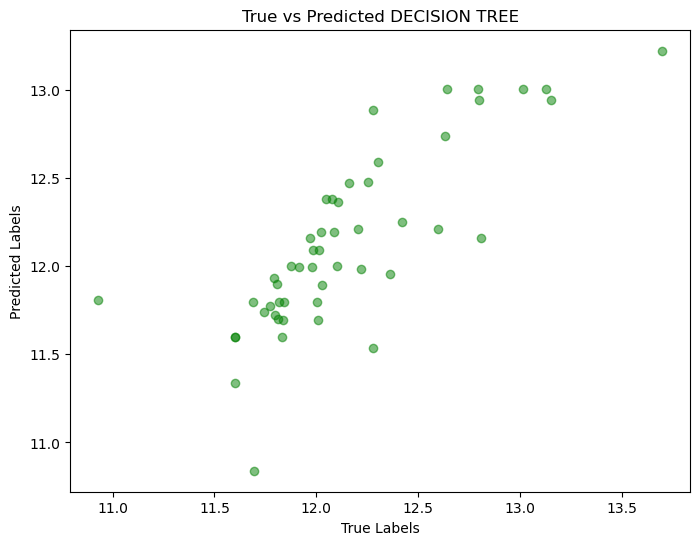

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_decision_tree, alpha=0.5,color="g")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted DECISION TREE")
plt.show()


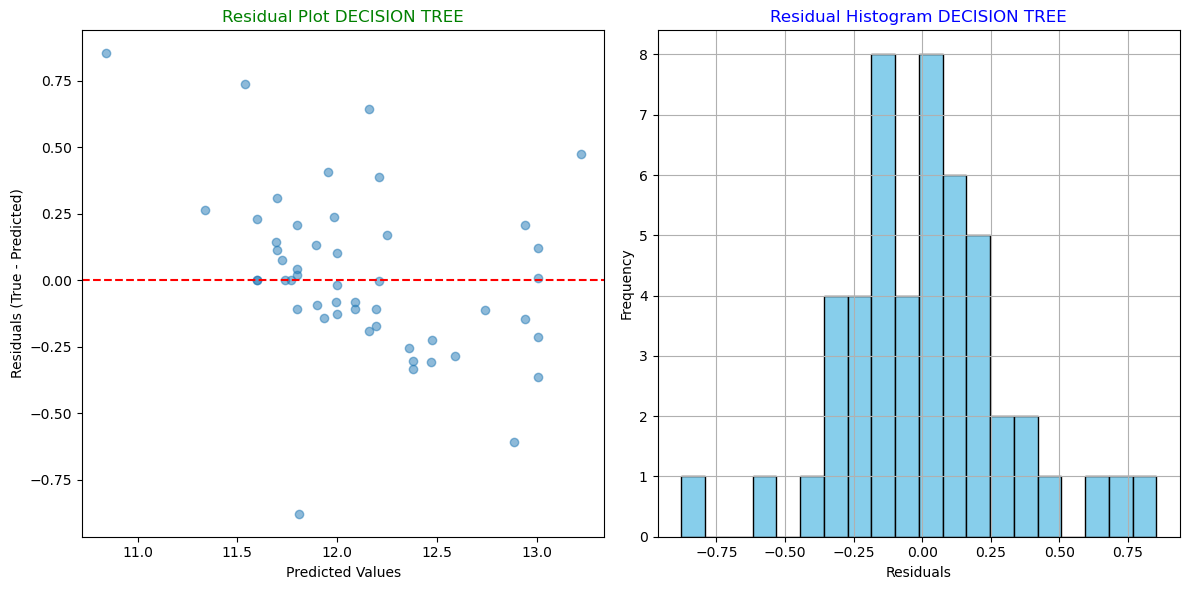

In [32]:
residuals = y_test - y_pred_decision_tree


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(y_pred_decision_tree, residuals, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals (True - Predicted)")
ax1.set_title("Residual Plot DECISION TREE", color="green")


ax2.hist(residuals, bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram DECISION TREE', color="blue")
ax2.grid(True)


plt.tight_layout()
plt.show()


### Random Forest

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

random_forest = RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 200, random_state=42)


random_forest.fit(X_train, y_train)


y_pred_random_forest = random_forest.predict(X_test)


mse = mean_squared_error(y_test, y_pred_random_forest)
r2 = r2_score(y_test, y_pred_random_forest)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)


Mean Squared Error (MSE): 0.06092587571212757
R-squared (R2) score: 0.7365469951611622


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd


mse = mean_squared_error(y_test, y_pred_random_forest)
print("Mean Squared Error (MSE):", mse)


r2 = r2_score(y_test, y_pred_random_forest)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_random_forest)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_random_forest)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)

metrics_df


Mean Squared Error (MSE): 0.06092587571212757
R-squared (R2) score: 0.7365469951611622
Explained Variance Score: 0.7368505934269466
Mean Absolute Error (MAE): 0.17480179840531357


,Metric,Value
0,Mean Squared Error (MSE),0.060926
1,R-squared (R2) Score,0.736547
2,Explained Variance,0.736851
3,Mean Absolute Error (MAE),0.174802


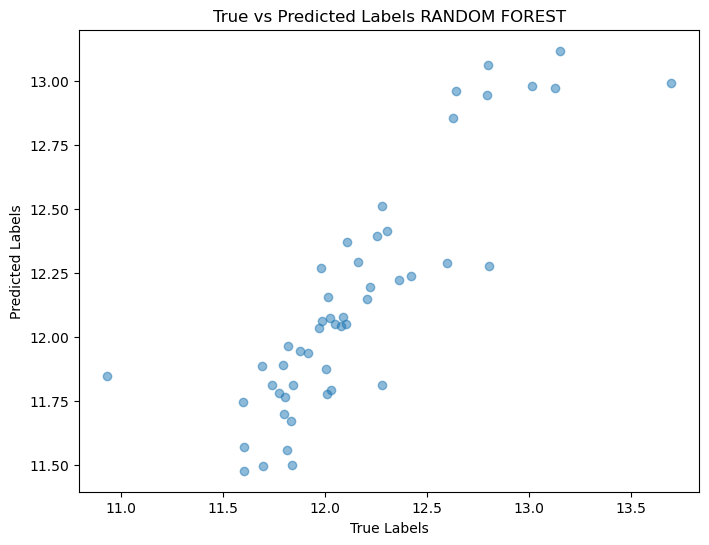

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random_forest, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted Labels RANDOM FOREST")
plt.show()


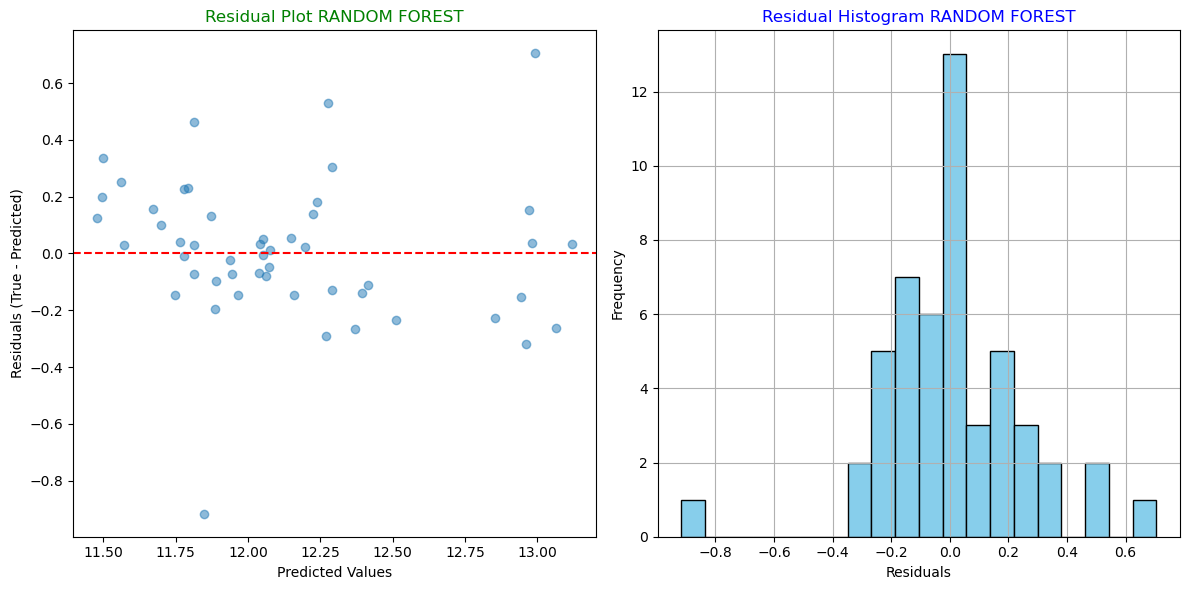

In [36]:
residuals_rf = y_test - y_pred_random_forest


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.scatter(y_pred_random_forest, residuals_rf, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals (True - Predicted)")
ax1.set_title("Residual Plot RANDOM FOREST", color="green")


ax2.hist(residuals_rf, bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram RANDOM FOREST', color="blue")
ax2.grid(True)


plt.tight_layout()
plt.show()


### Linear Regression

In [37]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_linear_regression = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_linear_regression)


r2 = r2_score(y_test, y_pred_linear_regression)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.06595117778454891
R-squared: 0.7148168039127382


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd

mse = mean_squared_error(y_test, y_pred_linear_regression)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred_linear_regression)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_linear_regression)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_linear_regression)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)

metrics_df


Mean Squared Error (MSE): 0.06595117778454891
R-squared (R2) score: 0.7148168039127382
Explained Variance Score: 0.7236438759769515
Mean Absolute Error (MAE): 0.1825678795674662


,Metric,Value
0,Mean Squared Error (MSE),0.065951
1,R-squared (R2) Score,0.714817
2,Explained Variance,0.723644
3,Mean Absolute Error (MAE),0.182568


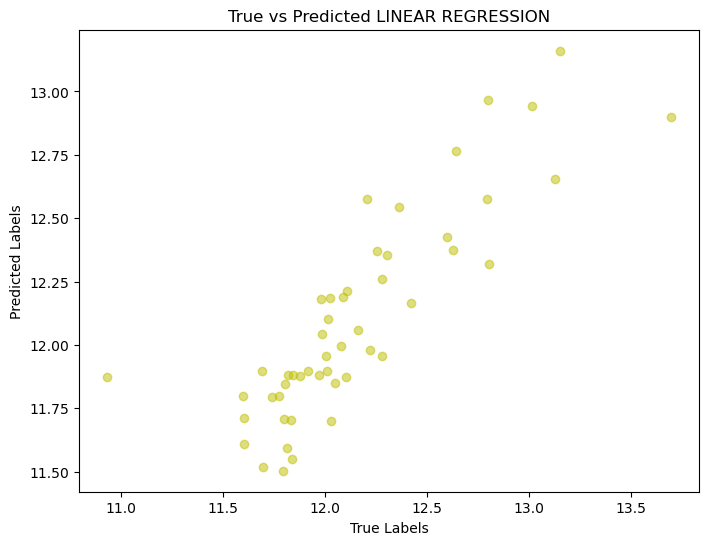

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear_regression, alpha=0.5,color="y")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted LINEAR REGRESSION")
plt.show()


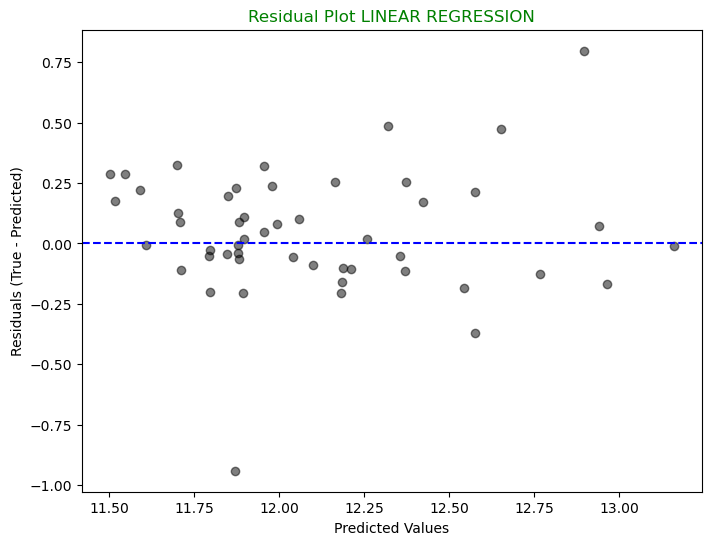

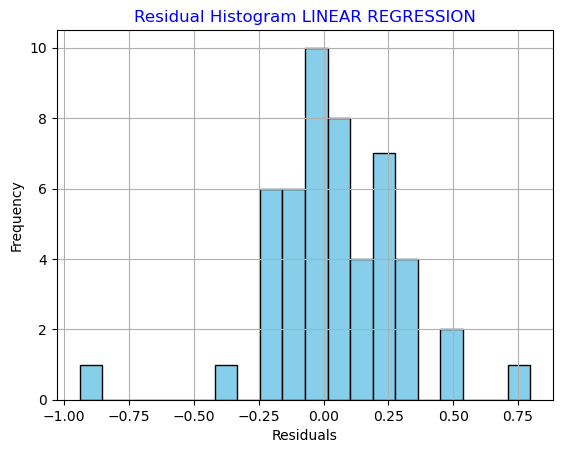

In [40]:
residuals = y_test -y_pred_linear_regression


plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear_regression, residuals, alpha=0.5,color="k")
plt.axhline(y=0, color='b', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residual Plot LINEAR REGRESSION",color = "green")
plt.show()
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram LINEAR REGRESSION',color = "blue")
plt.grid(True)

plt.show()

### Hyperparameter Tuning

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}


ridge = Ridge()


grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_alpha = grid_search.best_params_['alpha']


best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)


y_pred = best_ridge_model.predict(X_test)



r2 = r2_score(y_test, y_pred)

print("Best alpha:", best_alpha)
print("R-squared Score:", r2)


Best alpha: 0.1
R-squared Score: 0.7105461266267812


In [42]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_decision_tree = DecisionTreeRegressor(random_state=42, **best_params)


best_decision_tree.fit(X_train, y_train)


y_pred_best_decision_tree = best_decision_tree.predict(X_test)


mse_best = mean_squared_error(y_test, y_pred_best_decision_tree)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best_decision_tree)

print("Best Decision Tree Regression Results:")
print("Best Mean Squared Error:", mse_best)
print("Best Root Mean Squared Error (RMSE):", rmse_best)
print("Best R-squared:", r2_best)

Best Decision Tree Regression Results:
Best Mean Squared Error: 0.09111517567072233
Best Root Mean Squared Error (RMSE): 0.3018529040289696
Best R-squared: 0.6060037457599948


In [43]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_forest = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_random_forest = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)


best_random_forest.fit(X_train, y_train)


y_pred_best_random_forest = best_random_forest.predict(X_test)


mse_best_random_forest = mean_squared_error(y_test, y_pred_best_random_forest)
r2_best_random_forest = r2_score(y_test, y_pred_best_random_forest)

print("Random Forest Regression with Hyperparameter Tuning Results:")
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse_best_random_forest)
print("R-squared:", r2_best_random_forest)


Random Forest Regression with Hyperparameter Tuning Results:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.06109717780174852
R-squared: 0.7358062581636499


In [44]:
import pickle

# Assuming your model is named 'decision_tree' and has already been trained
with open('app.ipynb', 'wb') as model_file:
    pickle.dump(random_forest, model_file)


In [45]:
# Assuming your model is named 'decision_tree' and has already been trained
scalar = StandardScaler()
with open('app.ipynb', 'wb') as model_file:
    pickle.dump(scalar, model_file)


In [47]:
# Your list of column names
column_names = ['COST OF IMPLANT', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
                'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'GENDER', 'MARITAL STATUS', 'BP_CAT',
                'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2', 'hypertension3', 'other',
                'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', 'OS-ASD', 'PM-VSD', 'RHD', 'other- respiratory',
                'other-general', 'BMI', 'AGE_GROUP', 'AMBULANCE']


l = data[column_names]


### PCA FOR ALL MODELS

In [49]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import BayesianRidge

# Assuming 'l' contains your feature matrix and 'y' contains your target variable

r2_lr = []
r2_dt = []
r2_rf = []
r2_knn = []
r2_kmeans = []
r2_bayesian = []

optimal_features_lr = {}
optimal_features_dt = {}
optimal_features_rf = {}
optimal_features_knn = {}
optimal_features_kmeans = {}
optimal_features_bayesian = {}

list_of_components = [4, 8, 12, 16, 20, 24, 26]

for i in list_of_components:
    pca = PCA(n_components=i)
    pca.fit(l)
    data_pca = pca.transform(l)
    data_pca = pd.DataFrame(data_pca, columns=[j for j in range(i)])

    x_train, x_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.20, shuffle=True, random_state=42)

    # Linear Regression
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_lr.append(r2)
    optimal_features_lr[i] = {'Features': list(x_train.columns), 'R-squared': r2}

    # Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_dt.append(r2)
    optimal_features_dt[i] = {'Features': list(x_train.columns), 'R-squared': r2}

    # Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_rf.append(r2)
    optimal_features_rf[i] = {'Features': list(x_train.columns), 'R-squared': r2}

    # K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_knn.append(r2)
    optimal_features_knn[i] = {'Features': list(x_train.columns), 'R-squared': r2}

    # K-Means Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(x_train)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_train, labels)
    r2_kmeans.append(silhouette_avg)
    optimal_features_kmeans[i] = {'Features': list(x_train.columns), 'Silhouette Score': silhouette_avg}

    # Bayesian Ridge Regression
    bayesian_reg = BayesianRidge()
    bayesian_reg.fit(x_train, y_train)
    y_pred = bayesian_reg.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_bayesian.append({'Features': list(x_train.columns), 'R-squared': r2})
    optimal_features_bayesian[i] = {'Features': list(x_train.columns), 'R-squared': r2}

optimal_lr = max(optimal_features_lr, key=lambda k: optimal_features_lr[k]['R-squared'])
optimal_dt = max(optimal_features_dt, key=lambda k: optimal_features_dt[k]['R-squared'])
optimal_rf = max(optimal_features_rf, key=lambda k: optimal_features_rf[k]['R-squared'])
optimal_knn = max(optimal_features_knn, key=lambda k: optimal_features_knn[k]['R-squared'])
optimal_kmeans = max(optimal_features_kmeans, key=lambda k: optimal_features_kmeans[k]['Silhouette Score'])
optimal_bayesian = max(optimal_features_bayesian, key=lambda k: optimal_features_bayesian[k]['R-squared'])

print("Optimal number of features for Linear Regression:", optimal_lr)
print("Optimal number of features for Decision Tree:", optimal_dt)
print("Optimal number of features for Random Forest:", optimal_rf)
print("Optimal number of features for K-Nearest Neighbors:", optimal_knn)
print("Optimal number of features for K-Means Clustering:", optimal_kmeans)
print("Optimal number of features for Bayesian Ridge Regression:", optimal_bayesian)


C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

Optimal number of features for Linear Regression: 8
Optimal number of features for Decision Tree: 16
Optimal number of features for Random Forest: 16
Optimal number of features for K-Nearest Neighbors: 16
Optimal number of features for K-Means Clustering: 4
Optimal number of features for Bayesian Ridge Regression: 8


### PCA PLOT

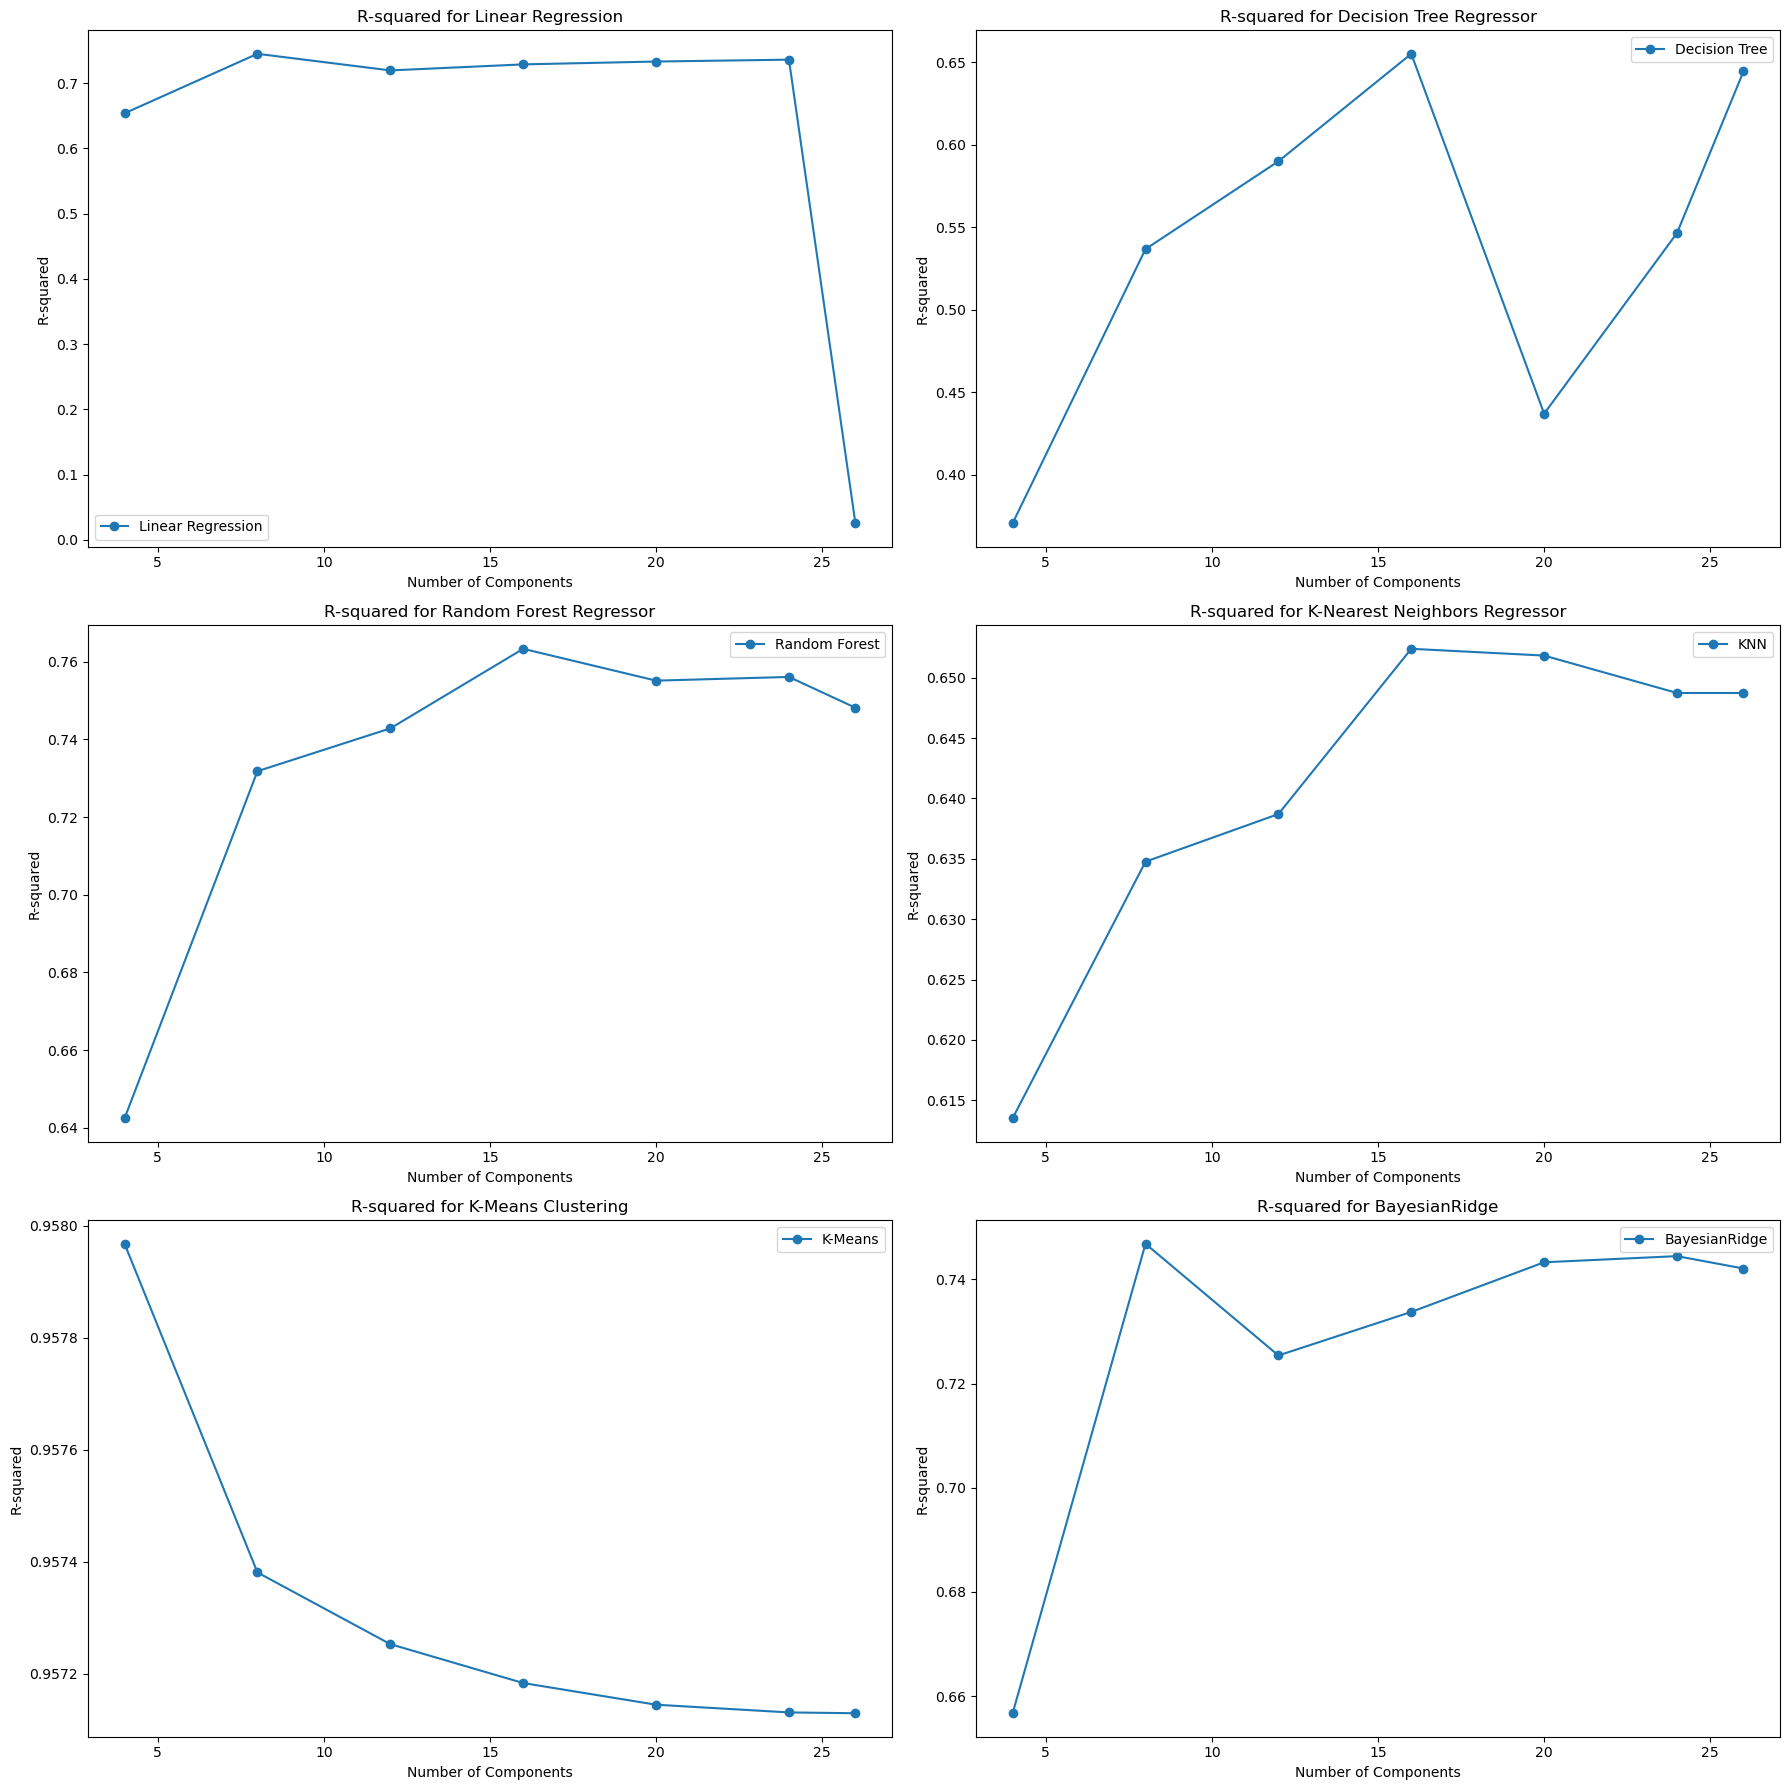

In [50]:
plt.figure(figsize=(18, 18))

# Plotting R-squared for Linear Regression
plt.subplot(3, 2, 1)
plt.plot(list_of_components, r2_lr, marker='o', label='Linear Regression')
plt.title('R-squared for Linear Regression')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

# Plotting R-squared for Decision Tree Regressor
plt.subplot(3, 2, 2)
plt.plot(list_of_components, r2_dt, marker='o', label='Decision Tree')
plt.title('R-squared for Decision Tree Regressor')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

# Plotting R-squared for Random Forest Regressor
plt.subplot(3, 2, 3)
plt.plot(list_of_components, r2_rf, marker='o', label='Random Forest')
plt.title('R-squared for Random Forest Regressor')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

# Plotting R-squared for K-Nearest Neighbors Regressor
plt.subplot(3, 2, 4)
plt.plot(list_of_components, r2_knn, marker='o', label='KNN')
plt.title('R-squared for K-Nearest Neighbors Regressor')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(list_of_components, r2_kmeans, marker='o', label='K-Means')
plt.title('R-squared for K-Means Clustering')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

# Extract R-squared values from the list of dictionaries for BayesianRidge
r2_bayesian_values = [item['R-squared'] for item in r2_bayesian]

# Plotting R-squared for BayesianRidge
plt.subplot(3, 2, 6)
plt.plot(list_of_components, r2_bayesian_values, marker='o', label='BayesianRidge')
plt.title('R-squared for BayesianRidge')
plt.xlabel('Number of Components')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()


### FINDING BEST FEATURES

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression,VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'l' and 'y' with your actual data
# Assuming 'l' is your feature matrix and 'y' is your target variable
k_best_features = 8  # Set the desired number of best features

# Linear Regression
selector_lr = SelectKBest(score_func=f_regression, k=k_best_features)
x_train_selected_lr = selector_lr.fit_transform(l, y)
best_features_lr = list(selector_lr.get_support(indices=True))

k_best_features = 16
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(l, y)
importances_dt = model_dt.feature_importances_
best_features_dt = list(importances_dt.argsort()[-k_best_features:][::-1])
k_best_features = 16

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(l, y)
importances_rf = model_rf.feature_importances_
best_features_rf = list(importances_rf.argsort()[-k_best_features:][::-1])
k_best_features = 16

# K-Nearest Neighbors Regressor
selector_knn = VarianceThreshold()
x_train_selected_knn = selector_knn.fit_transform(l)
best_features_knn = list(selector_knn.get_support(indices=True))

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(l)
labels = kmeans.labels_
silhouette_avg = silhouette_score(l, labels)
best_features_kmeans = [0, 1, 2, 3]  # Placeholder, replace with your feature selection method for clustering
k_best_features = 8

# Bayesian Ridge Regression
selector_bayesian = SelectKBest(score_func=f_regression, k=k_best_features)
x_train_selected_bayesian = selector_bayesian.fit_transform(l, y)
best_features_bayesian = list(selector_bayesian.get_support(indices=True))

print("Best features for Linear Regression:", best_features_lr)
print("Best features for Decision Tree:", best_features_dt)
print("Best features for Random Forest:", best_features_rf)
print("Best features for K-Nearest Neighbors:", best_features_knn)
print("Best features for K-Means Clustering:", best_features_kmeans)
print("Best features for Bayesian Ridge Regression:", best_features_bayesian)


C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best features for Linear Regression: [0, 1, 3, 4, 7, 10, 16, 26]
Best features for Decision Tree: [1, 3, 2, 24, 4, 0, 15, 6, 25, 8, 16, 10, 14, 11, 22, 7]
Best features for Random Forest: [1, 2, 0, 3, 24, 15, 25, 8, 4, 6, 14, 23, 7, 10, 18, 16]
Best features for K-Nearest Neighbors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Best features for K-Means Clustering: [0, 1, 2, 3]
Best features for Bayesian Ridge Regression: [0, 1, 3, 4, 7, 10, 16, 26]


### LinearRegression After Pca

In [76]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(l, y, test_size=0.20, shuffle=True, random_state=42)

# # Best features for Linear Regression
# best_features_lr = [0, 1, 3, 4, 7, 10, 16, 26]

# # Linear Regression
# lr_model = LinearRegression()
# lr_model.fit(X_train.iloc[:, best_features_lr], y_train)
# y_pred_lr = lr_model.predict(X_test.iloc[:, best_features_lr])
# r2_lr = r2_score(y_test, y_pred_lr)
# print(f'R-squared for Linear Regression: {r2_lr}')

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Calculate predictions for the training set to demonstrate metrics
y_train_pred_lr = lr_model.predict(X_train.iloc[:, best_features_lr])

# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-squared for Linear Regression: {r2_lr}')

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error (MSE) for Linear Regression: {mse_lr}')

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'Mean Absolute Error (MAE) for Linear Regression: {mae_lr}')

# Calculate Explained Variance Score
explained_var_lr = explained_variance_score(y_test, y_pred_lr)
print(f'Explained Variance Score for Linear Regression: {explained_var_lr}')



R-squared for Linear Regression: 0.7034366936497236
Mean Squared Error (MSE) for Linear Regression: 0.06858293058577004
Mean Absolute Error (MAE) for Linear Regression: 0.18187079337161582
Explained Variance Score for Linear Regression: 0.7186686809629922


### DecisionTree After PCA

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Best features for Decision Tree
best_features_dt = [1, 3, 2, 24, 4, 0, 15, 6, 25, 8, 16, 10, 14, 11, 22, 7]

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train.iloc[:, best_features_dt], y_train)
y_pred_dt = dt_model.predict(X_test.iloc[:, best_features_dt])
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R-squared for Decision Tree: {r2_dt}')


R-squared for Decision Tree: 0.6270321374293442


### RandomForest After Pca

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Best features for Random Forest
best_features_rf = [1, 2, 0, 3, 24, 15, 25, 8, 4, 6, 14, 23, 7, 10, 18, 16]

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.iloc[:, best_features_rf], y_train)
y_pred_rf = rf_model.predict(X_test.iloc[:, best_features_rf])
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared for Random Forest: {r2_rf}')

R-squared for Random Forest: 0.7816359915248523


In [55]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd

mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred_rf)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_rf)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)

metrics_df


Mean Squared Error (MSE): 0.05049863996995325
R-squared (R2) score: 0.7816359915248523
Explained Variance Score: 0.7840544530821132
Mean Absolute Error (MAE): 0.1662530963279484


,Metric,Value
0,Mean Squared Error (MSE),0.050499
1,R-squared (R2) Score,0.781636
2,Explained Variance,0.784054
3,Mean Absolute Error (MAE),0.166253


### Random Forest plots

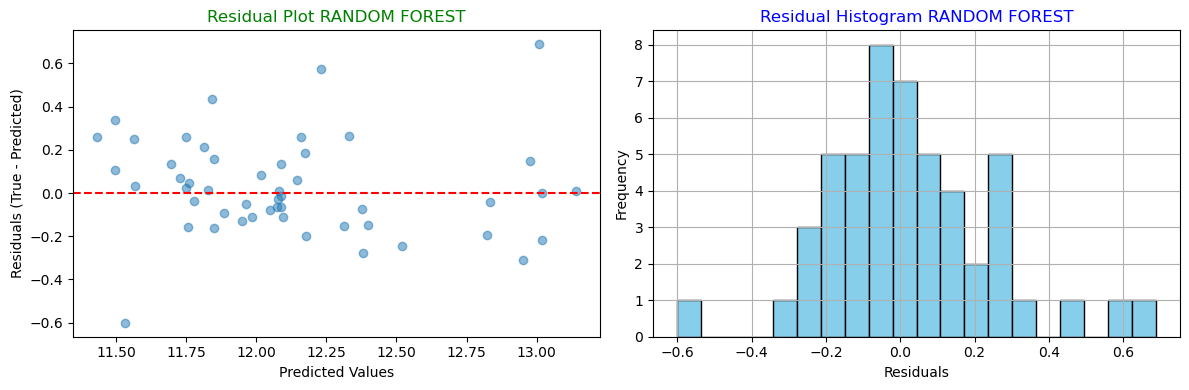

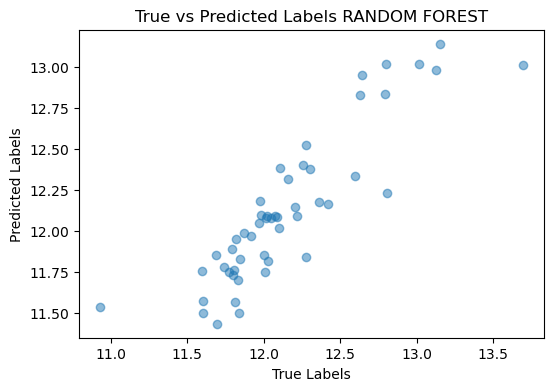

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals and Residual Histogram for RANDOM FOREST
residuals_rf = y_test - y_pred_rf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Plot
ax1.scatter(y_pred_rf, residuals_rf, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals (True - Predicted)")
ax1.set_title("Residual Plot RANDOM FOREST", color="green")

# Residual Histogram
ax2.hist(residuals_rf, bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram RANDOM FOREST', color="blue")
ax2.grid(True)

plt.tight_layout()
plt.show()

# True vs Predicted Labels for RANDOM FOREST
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted Labels RANDOM FOREST")
plt.show()


### Random Forest Hyper parameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_forest = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_random_forest = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)


best_random_forest.fit(X_train, y_train)


y_pred_best_random_forest = best_random_forest.predict(X_test)


mse_best_random_forest = mean_squared_error(y_test, y_pred_best_random_forest)
r2_best_random_forest = r2_score(y_test, y_pred_best_random_forest)

print("Random Forest Regression with Hyperparameter Tuning Results:")
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse_best_random_forest)
print("R-squared:", r2_best_random_forest)


Random Forest Regression with Hyperparameter Tuning Results:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 0.0524038667451346
R-squared: 0.7733974933013295


### KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Best features for K-Nearest Neighbors
best_features_knn = [i for i in range(27)]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train.iloc[:, best_features_knn], y_train)
y_pred_knn = knn_model.predict(X_test.iloc[:, best_features_knn])
r2_knn = r2_score(y_test, y_pred_knn)
print(f'R-squared for K-Nearest Neighbors: {r2_knn}')


R-squared for K-Nearest Neighbors: 0.6487343803089936


In [60]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd

mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred_knn)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_knn)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)

metrics_df


Mean Squared Error (MSE): 0.08123333229897861
R-squared (R2) score: 0.6487343803089936
Explained Variance Score: 0.6514967722799971
Mean Absolute Error (MAE): 0.2192713919476653


,Metric,Value
0,Mean Squared Error (MSE),0.081233
1,R-squared (R2) Score,0.648734
2,Explained Variance,0.651497
3,Mean Absolute Error (MAE),0.219271


### KNN Plots

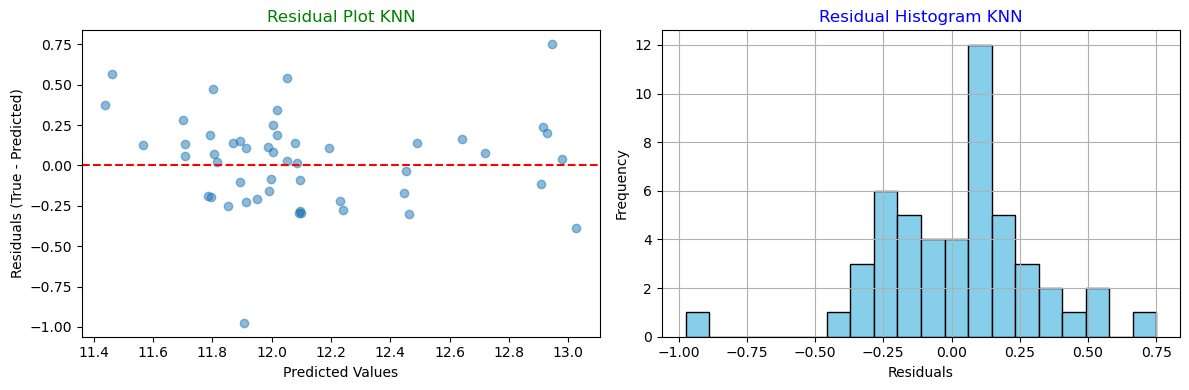

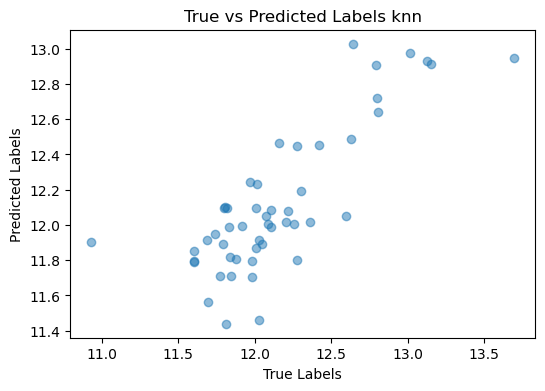

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals and Residual Histogram for RANDOM FOREST
residuals_knn = y_test - y_pred_knn

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Plot
ax1.scatter(y_pred_knn, residuals_knn, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals (True - Predicted)")
ax1.set_title("Residual Plot KNN", color="green")

# Residual Histogram
ax2.hist(residuals_knn, bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram KNN', color="blue")
ax2.grid(True)

plt.tight_layout()
plt.show()

# True vs Predicted Labels for RANDOM FOREST
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted Labels knn")
plt.show()


### KNN Hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Adjust the values based on your preference
}

# Create the KNN model
knn_model = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train.iloc[:, best_features_knn], y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_knn_best = best_knn_model.predict(X_test.iloc[:, best_features_knn])

# Evaluate the performance of the best model
r2_knn_best = r2_score(y_test, y_pred_knn_best)
print(f"Best parameters: {best_params}")
print(f"R-squared for the best K-Nearest Neighbors model: {r2_knn_best}")


Best parameters: {'n_neighbors': 7}
R-squared for the best K-Nearest Neighbors model: 0.6373717258091147


### K-means clustering

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Best features for K-Means Clustering
best_features_kmeans = [0, 1, 2, 3]

# K-Means Clustering
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train.iloc[:, best_features_kmeans])
labels = kmeans_model.labels_
silhouette_avg = silhouette_score(X_train.iloc[:, best_features_kmeans], labels)

# Print the silhouette score
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg}')


C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means Clustering: 0.6018795907607405


### k-means pca Plots after and before

C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

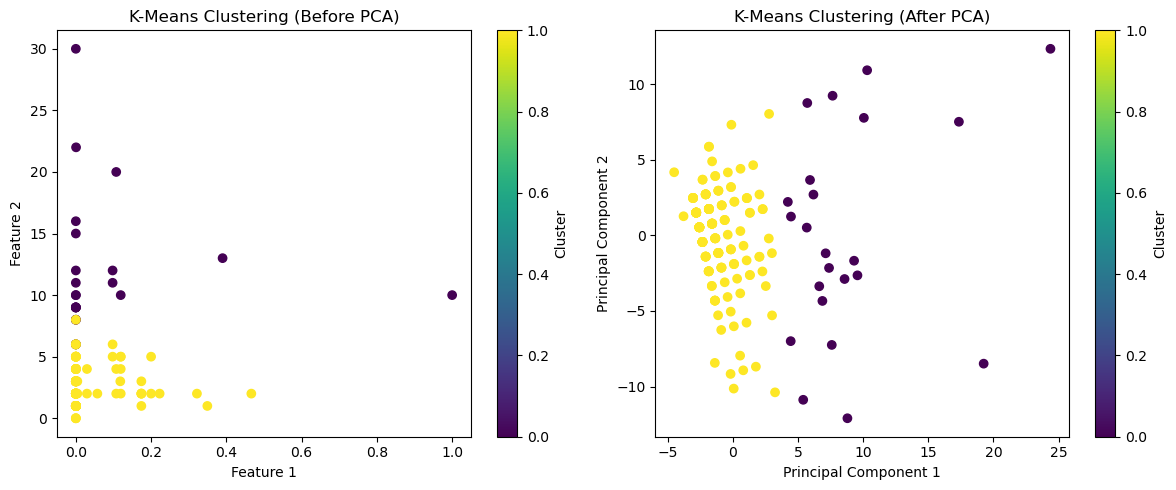

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Best features for K-Means Clustering
best_features_kmeans = [0, 1, 2, 3]

# K-Means Clustering without PCA
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train.iloc[:, best_features_kmeans])
labels = kmeans_model.labels_

# Scatter plot of data without PCA and with cluster assignments
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, best_features_kmeans[0]], X_train.iloc[:, best_features_kmeans[1]], c=labels, cmap='viridis')
plt.title('K-Means Clustering (Before PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train.iloc[:, best_features_kmeans])

# K-Means Clustering after PCA
kmeans_model_pca = KMeans(n_clusters=2, random_state=42)
kmeans_model_pca.fit(data_pca)
labels_pca = kmeans_model_pca.labels_

# Scatter plot of PCA-transformed data with cluster assignments
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title('K-Means Clustering (After PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


### K-means clustering Hyperparameter Tuning

C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

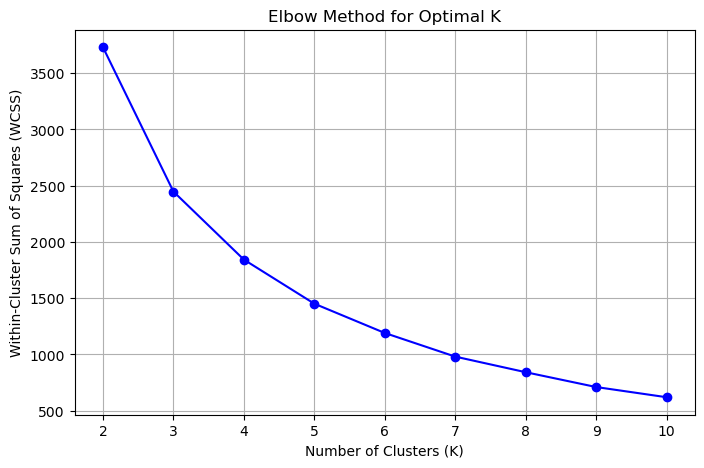

C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Praneeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Optimal K: 2
Silhouette Score: 0.6018795907607405


In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize a list to store the inertia (WCSS) values for different K
wcss = []

# Define a range of K values to test
k_values = range(2, 11)  # Example range of K values

# Calculate WCSS for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train.iloc[:, best_features_kmeans])
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Find the optimal K using the elbow method (visual inspection)
optimal_k = 2  # Adjust based on the visual inspection of the elbow plot

# Fit KMeans model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train.iloc[:, best_features_kmeans])

# Predict cluster labels
cluster_labels = kmeans.predict(X_train.iloc[:, best_features_kmeans])

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_train.iloc[:, best_features_kmeans], cluster_labels)
print(f"Optimal K: {optimal_k}")
print(f"Silhouette Score: {silhouette_avg}")


### Bayesian Ridge

In [66]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

# Best features for Bayesian Ridge Regression
best_features_bayesian = [0, 1, 3, 4, 7, 10, 16, 26]

# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train.iloc[:, best_features_bayesian], y_train)
y_pred_bayesian = bayesian_model.predict(X_test.iloc[:, best_features_bayesian])
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f'R-squared for Bayesian Ridge Regression: {r2_bayesian}')

R-squared for Bayesian Ridge Regression: 0.7092609749508703


In [67]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import pandas as pd

mse = mean_squared_error(y_test, y_pred_bayesian)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred_bayesian)
print("R-squared (R2) score:", r2)


explained_variance = explained_variance_score(y_test, y_pred_bayesian)
print("Explained Variance Score:", explained_variance)


mae = mean_absolute_error(y_test, y_pred_bayesian)
print("Mean Absolute Error (MAE):", mae)


metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R2) Score', 'Explained Variance', 'Mean Absolute Error (MAE)'],
    'Value': [mse, r2, explained_variance, mae]
}


metrics_df = pd.DataFrame(metrics)

metrics_df


Mean Squared Error (MSE): 0.06723601317678772
R-squared (R2) score: 0.7092609749508703
Explained Variance Score: 0.7213057949046082
Mean Absolute Error (MAE): 0.17821151139354377


,Metric,Value
0,Mean Squared Error (MSE),0.067236
1,R-squared (R2) Score,0.709261
2,Explained Variance,0.721306
3,Mean Absolute Error (MAE),0.178212


### Bayesian Ridge plots

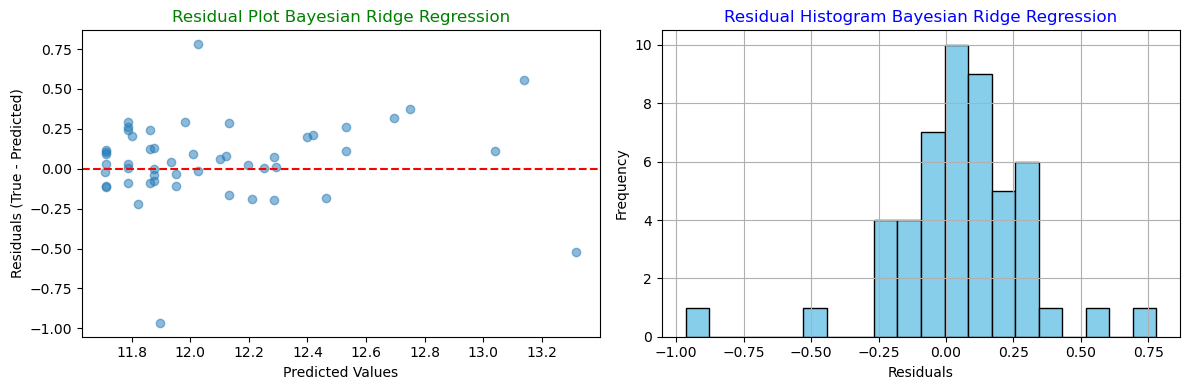

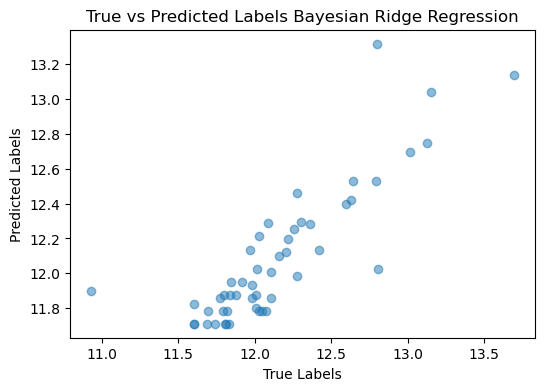

In [68]:
# Residuals and Residual Histogram for Bayesian Ridge Regression
residuals_bayesian = y_test - y_pred_bayesian

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Plot
ax1.scatter(y_pred_bayesian, residuals_bayesian, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals (True - Predicted)")
ax1.set_title("Residual Plot Bayesian Ridge Regression", color="green")

# Residual Histogram
ax2.hist(residuals_bayesian, bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram Bayesian Ridge Regression', color="blue")
ax2.grid(True)

plt.tight_layout()
plt.show()

# True vs Predicted Labels for Bayesian Ridge Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_bayesian, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs Predicted Labels Bayesian Ridge Regression")
plt.show()


### Bayesian Ridge Hyperparameter Tuning

In [70]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Best features for Bayesian Ridge Regression
best_features_bayesian = [0, 1, 3, 4, 7, 10, 16, 26]

# Bayesian Ridge Regression
bayesian_model = BayesianRidge()

# Define the hyperparameter grid
param_grid = {
    'alpha_1': [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10],
    'alpha_2': [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10],
    'lambda_1': [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10],
    'lambda_2': [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10],
}

# Create R-squared scorer for GridSearchCV
scorer = make_scorer(r2_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bayesian_model, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train.iloc[:, best_features_bayesian], y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_bayesian_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_bayesian_best = best_bayesian_model.predict(X_test.iloc[:, best_features_bayesian])

# Evaluate the performance of the best model
r2_bayesian_best = r2_score(y_test, y_pred_bayesian_best)
print(f"Best parameters: {best_params}")
print(f"R-squared for the best Bayesian Ridge Regression model: {r2_bayesian_best}")


Best parameters: {'alpha_1': 1, 'alpha_2': 1, 'lambda_1': 10, 'lambda_2': 1}
R-squared for the best Bayesian Ridge Regression model: 0.7090904813994359


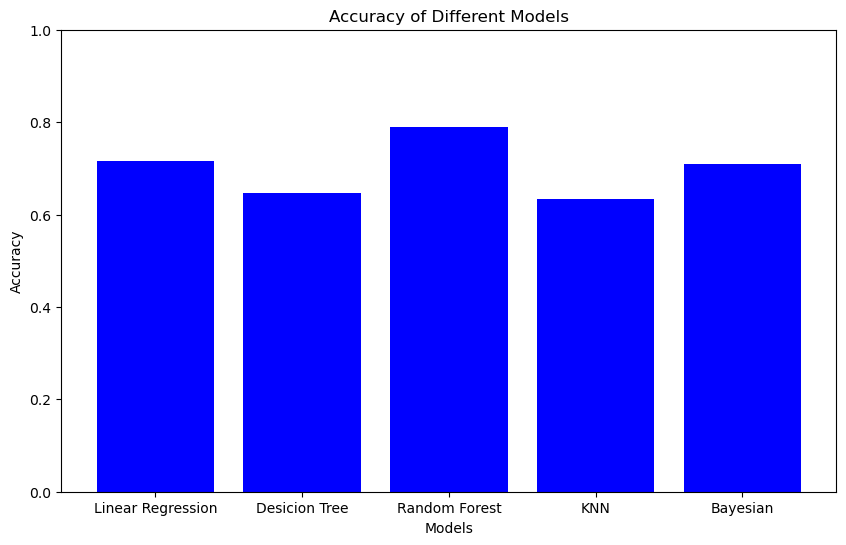

In [39]:
import matplotlib.pyplot as plt

# Example list of models and accuracy values
models = ['Linear Regression', 'Desicion Tree', 'Random Forest', 'KNN',  'Bayesian']
accuracies = [0.714816803912738,0.64565, 0.789876, 0.634543, 0.7090904813994359]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy as a percentage
plt.show()
